<a href="https://colab.research.google.com/github/Shahinaf23/Machine-Learning/blob/main/Copy_of_COR_in_healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

In [ ]:
from pandas.core.groupby.generic import DataFrameGroupBy
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

In [ ]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(df[['age','thalach']])
y_predicted

array([1, 0, 2, ..., 2, 0, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2


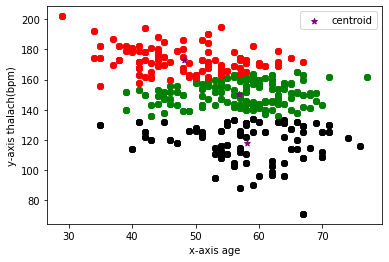

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.age,df1['thalach'],color='green')
plt.scatter(df2.age,df2['thalach'],color='red')
plt.scatter(df3.age,df3['thalach'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('x-axis age')
plt.ylabel('y-axis thalach(bpm)')
plt.legend()

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['thalach']])
df['thalach'] = scaler.transform(df[['thalach']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

Text(0, 0.5, 'y-axis count')

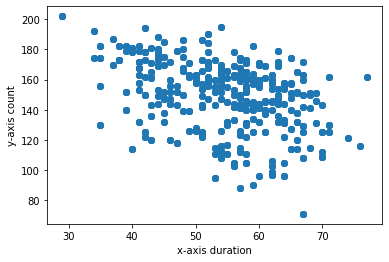

In [ ]:
plt.scatter(df.age,df['thalach'])
plt.xlabel('x-axis duration')
plt.ylabel('y-axis count')


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','thalach']])
y_predicted

array([1, 0, 2, ..., 2, 1, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,0.479167,1,0,125,212,0,1,0.740458,0,1.0,2,2,3,0,1
1,0.500000,1,0,140,203,1,0,0.641221,1,3.1,0,0,3,0,0
2,0.854167,1,0,145,174,0,1,0.412214,1,2.6,0,0,3,0,2
3,0.666667,1,0,148,203,0,1,0.687023,0,0.0,2,1,3,0,0
4,0.687500,0,0,138,294,1,1,0.267176,0,1.9,1,3,2,0,2


In [ ]:
km.cluster_centers_

array([[0.64629744, 0.64639861],
       [0.32825067, 0.70183984],
       [0.64348118, 0.35591603]])

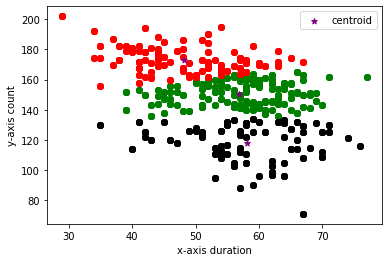

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.age,df1['thalach'],color='green')
plt.scatter(df2.age,df2['thalach'],color='red')
plt.scatter(df3.age,df3['thalach'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('x-axis duration')
plt.ylabel('y-axis count')
plt.legend()

In [ ]:
import seaborn as sns

Text(0, 0.5, 'y-axis thalach')

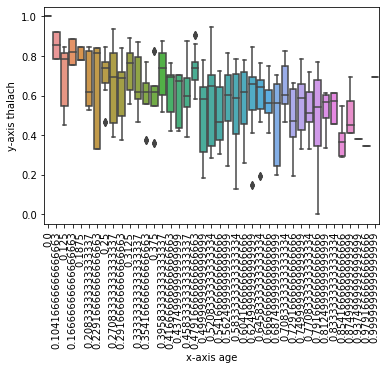

In [ ]:
df=df[['age','thalach']]
df=pd.DataFrame(df)

sns.boxplot(y='thalach', x='age',data=df)
plt.xticks(rotation=90)
plt.xlabel('x-axis age')
plt.ylabel('y-axis thalach')

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final
df_final=remove_outlier_IQR(df)

Text(0, 0.5, 'thalach')

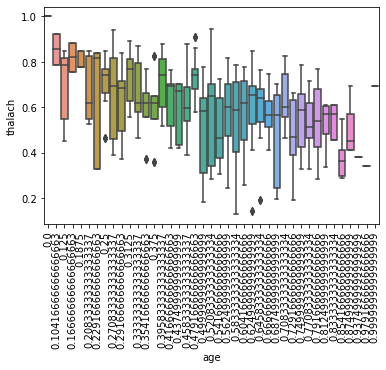

In [ ]:
df_outlier_removed=remove_outlier_IQR(df.age)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
    
sns.boxplot(y='thalach', x='age',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('thalach')

In [ ]:
len(ind_diff)

0

In [ ]:
y_predicted = km.fit_predict(df[['age','trestbps']])
y_predicted

array([0, 0, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0


In [ ]:
km.cluster_centers_

array([[ 54.30390144, 133.94250513],
       [ 60.35195531, 159.83798883],
       [ 51.66016713, 114.37604457]])

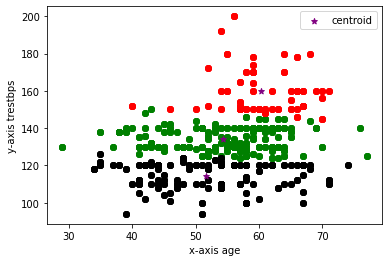

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.age,df1['trestbps'],color='green')
plt.scatter(df2.age,df2['trestbps'],color='red')
plt.scatter(df3.age,df3['trestbps'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('x-axis age')
plt.ylabel('y-axis trestbps')
plt.legend()